<a href="https://colab.research.google.com/github/harsh16kh/stock_price_analysis/blob/main/Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
pip install backtrader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 33.3 MB/s 


# Basic Setup

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import backtrader as bt

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


# Setting the Cash

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import backtrader as bt

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.broker.setcash(100000.0)

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


# Adding a Data Feed

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving oracle.csv to oracle.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /MyDrive/

In [ ]:
pip install yfinance
import yfinance

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values after this date
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


# Our First Strategy

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Strategy
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, Close, 26.55
2000-02-14, Close, 27.66
2000-02-15, Close, 27.30
2000-02-16, Close, 27.24
2000-02-17, Close, 27.41
2000-02-18, Close, 26.05
2000-02-22, Close, 26.38
2000-02-23, Close, 28.05
2000-02-24, Close, 27.55
2000-02-25, Close, 31.41
2000-02-28, Cl

# Adding some Logic to the Strategy

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Strategy
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, Close, 21.35
2000-01-06, BUY CREATE, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-12, BUY CREATE, 23.49
2000-01-13, Close, 23.36
2000-01-13, BUY CREATE, 23.36
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, Close, 21.07
2000-01-28, BUY CREATE, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, Close, 26.55
2000-02-14, Close, 27.66
2000-02-15, Close, 27.30
2000-02-1

# Don't only buy but sell!

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, BUY EXECUTED, 22.27
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-13, SELL CREATE, 23.36
2000-01-14, SELL EXECUTED, 24.24
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, BUY EXECUTED, 22.90
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-04, SELL CREATE, 25.71
2000-02-07, SELL EXECUTED, 26.38
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, 

# Add commission

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Set the commission - 0.1% ... divide by 100 to remove the %
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, BUY EXECUTED, Price: 22.27, Cost: 22.27, Comm 0.02
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-13, SELL CREATE, 23.36
2000-01-14, SELL EXECUTED, Price: 24.24, Cost: 22.27, Comm 0.02
2000-01-14, OPERATION PROFIT, GROSS 1.97, NET 1.92
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, BUY EXECUTED, Price: 22.90, Cost: 22.90, Comm 0.02
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-04, SELL CREATE, 25.71
2

# Setting Parameters

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('exitbars', 10),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + self.params.exitbars):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission - 0.1% ... divide by 100 to remove the %
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, BUY EXECUTED, Price: 22.27, Cost: 222.70, Comm 0.22
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-21, SELL CREATE, 26.55
2000-01-24, SELL EXECUTED, Price: 26.80, Cost: 222.70, Comm 0.27
2000-01-24, OPERATION PROFIT, GROSS 45.30, NET 44.81
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, BUY EXECUTED, Price: 22.90, Cost: 229.00, Comm 0.23
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-07, Close, 26.66
20

# Adding Simple Moving Average Indicator

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10000000000)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-25, BUY CREATE, 25.10
2000-01-26, Order Canceled/Margin/Rejected
2000-01-26, Close, 24.49
2000-01-26, BUY CREATE, 24.49
2000-01-27, Order Canceled/Margin/Rejected
2000-01-27, Close, 23.04
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-02, BUY CREATE, 24.16
2000-02-03, Order Canceled/Margin/Rejected
2000-02-03, Close, 25.21
2000-02-03, BUY CREATE, 25.21
2000-02-04, Order Canceled/Margin/Rejected
2000-02-04, Close, 25.71
2000-02-04, BUY CREATE, 25.71
2000-02-07, Order Canceled/Margin/Rejected
2000-02-07, Close, 26.66
2000-02-07, BUY CREATE, 26.66
2000-02-08, Order Canceled/Margin/Rejected
2000-02-08, Close, 26.49
2000-02-08, BUY CREATE, 26.49
2000-02-09, Order Canceled/Margin/Rejected
2000-02-09, Close, 26.66
2000-02-09, BUY CREATE, 26.66
2000-02-10, Order Canceled/Margin/Rejected
2000-02-10, Close, 27.71
2000-02-10, BUY CREATE, 27.71
2

# Visual Inspection: Plotting

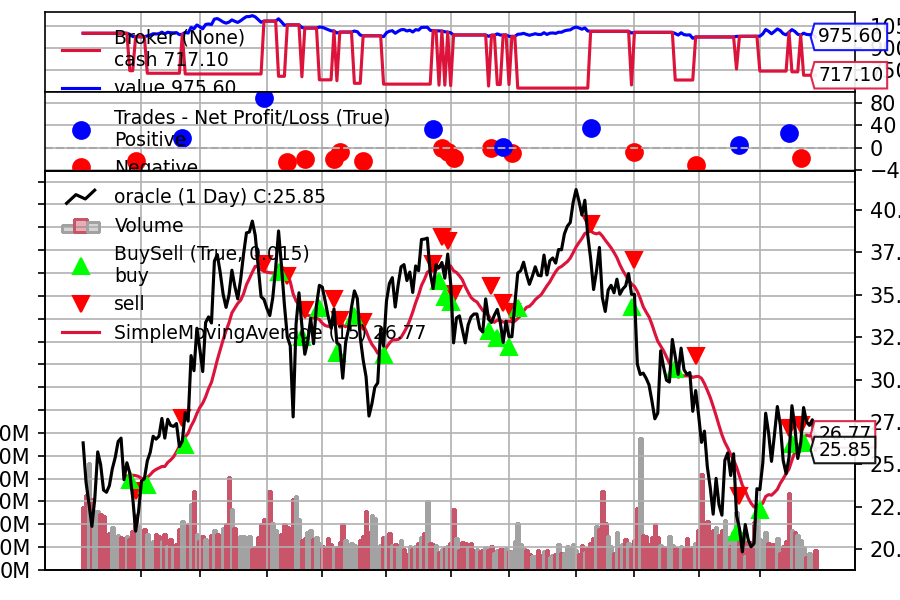

In [ ]:
import matplotlib
from IPython.display import Image
chart_file = 'result.png'
cerebro.plot()[0][0].savefig(chart_file, dpi=150, )
Image(open(chart_file, 'rb').read())

# Adding a set of Indicators in a strategy plot

In [ ]:
pip install image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 12.6 MB/s 
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=2d224a6463ee297c97a826c426a78ebce2b6e02f448b814d09803bf791e0c20f
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built image


In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt
from IPython.display import Image


# Create a Stratey
class TestStrategy(bt.Strategy): 
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=15)
        # Indicators for the plotting show
        self.ema = bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        self.wma = bt.indicators.WeightedMovingAverage(self.datas[0], period=25).subplot = True
        self.ss= bt.indicators.StochasticSlow(self.datas[0])
        self.macd= bt.indicators.MACDHisto(self.datas[0])
        rsi = bt.indicators.RSI(self.datas[0])
        self.sma= bt.indicators.SmoothedMovingAverage(rsi, period=10)
        self.atr= bt.indicators.ATR(self.datas[0]).plot = False

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

   # Run Cerebro Engine
    cerebro.run()
    chart_file = 'result1.png'
    cerebro.plot()[0][0].savefig(chart_file)
    Image(open(chart_file, 'rb').read())

# Optimising Strategy

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])


# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
        ('printlog', False),
    )

    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

    def stop(self):
        self.log('(MA Period %2d) Ending Value %.2f' %
                 (self.params.maperiod, self.broker.getvalue()), doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        maperiod=range(10, 31))

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    #modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    #datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='oracle.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Run over everything
    cerebro.run(maxcpus=1)

2000-12-29, (MA Period 10) Ending Value 877.50
2000-12-29, (MA Period 11) Ending Value 878.70
2000-12-29, (MA Period 12) Ending Value 839.80
2000-12-29, (MA Period 13) Ending Value 899.90
2000-12-29, (MA Period 14) Ending Value 902.50
2000-12-29, (MA Period 15) Ending Value 975.60
2000-12-29, (MA Period 16) Ending Value 961.90
2000-12-29, (MA Period 17) Ending Value 952.60
2000-12-29, (MA Period 18) Ending Value 1011.00
2000-12-29, (MA Period 19) Ending Value 1039.40
2000-12-29, (MA Period 20) Ending Value 1073.20
2000-12-29, (MA Period 21) Ending Value 1055.10
2000-12-29, (MA Period 22) Ending Value 1057.60
2000-12-29, (MA Period 23) Ending Value 1021.50
2000-12-29, (MA Period 24) Ending Value 1018.80
2000-12-29, (MA Period 25) Ending Value 1012.40
2000-12-29, (MA Period 26) Ending Value 998.30
2000-12-29, (MA Period 27) Ending Value 983.10
2000-12-29, (MA Period 28) Ending Value 976.90
2000-12-29, (MA Period 29) Ending Value 984.20
2000-12-29, (MA Period 30) Ending Value 980.80


# Moving Average Crossover strategy class

In [ ]:

class MAcrossover(bt.Strategy): 
	# Moving average parameters
	params = (('pfast',20),('pslow',50),)

	def log(self, txt, dt=None):
		dt = dt or self.datas[0].datetime.date(0)
		print(f'{dt.isoformat()} {txt}') # Comment this line when running optimization

	def __init__(self):
		self.dataclose = self.datas[0].close
		
		# Order variable will contain ongoing order details/status
		self.order = None

		# Instantiate moving averages
		self.fast_sma = bt.indicators.MovingAverageSimple(self.datas[0], period=self.params.pfast)
		self.slow_sma = bt.indicators.MovingAverageSimple(self.datas[0], period=self.params.pslow)
		
		''' Using the built-in crossover indicator
		self.crossover = bt.indicators.CrossOver(self.fast_sma, self.slow_sma)'''


	def notify_order(self, order):
		if order.status in [order.Submitted, order.Accepted]:
			# An active Buy/Sell order has been submitted/accepted - Nothing to do
			return

		# Check if an order has been completed
		# Attention: broker could reject order if not enough cash
		if order.status in [order.Completed]:
			if order.isbuy():
				self.log(f'BUY EXECUTED, {order.executed.price:.2f}')
			elif order.issell():
				self.log(f'SELL EXECUTED, {order.executed.price:.2f}')
			self.bar_executed = len(self)

		elif order.status in [order.Canceled, order.Margin, order.Rejected]:
			self.log('Order Canceled/Margin/Rejected')

		# Reset orders
		self.order = None

	def next(self):
		''' Logic for using the built-in crossover indicator
		
		if self.crossover > 0: # Fast ma crosses above slow ma
			pass # Signal for buy order
		elif self.crossover < 0: # Fast ma crosses below slow ma
			pass # Signal for sell order
		'''

		# Check for open orders
		if self.order:
			return

		# Check if we are in the market
		if not self.position:
			# We are not in the market, look for a signal to OPEN trades
				
			#If the 20 SMA is above the 50 SMA
			if self.fast_sma[0] > self.slow_sma[0] and self.fast_sma[-1] < self.slow_sma[-1]:
				self.log(f'BUY CREATE {self.dataclose[0]:2f}')
				# Keep track of the created order to avoid a 2nd order
				self.order = self.buy()
			#Otherwise if the 20 SMA is below the 50 SMA   
			elif self.fast_sma[0] < self.slow_sma[0] and self.fast_sma[-1] > self.slow_sma[-1]:
				self.log(f'SELL CREATE {self.dataclose[0]:2f}')
				# Keep track of the created order to avoid a 2nd order
				self.order = self.sell()
		else:
			# We are already in the market, look for a signal to CLOSE trades
			if len(self) >= (self.bar_executed + 5):
				self.log(f'CLOSE CREATE {self.dataclose[0]:2f}')
				self.order = self.close()


# Mean Reversion Strategy as an example

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mid_data_4000_H1.csv to mid_data_4000_H1.csv


In [ ]:
import backtrader as bt
import pandas as pd
import csv

class BBADX(bt.Strategy):
    '''Mean Reversion trading strategy that utilizes Bollinger Bands for signals and ADX for locating and avoiding trends'''

    # Parameters that can be optimized for best performance for different markets or candlestick timeframes
    params = (('BB_MA', 20), ('BB_SD', 2), ('ADX_Period', 14), ('ADX_Max', 40))

    def __init__(self):
        '''Initializes all variables to be used in this strategy'''
        self.order = None
        self.stopprice = None
        self.closepos = None
        self.adx = bt.indicators.AverageDirectionalMovementIndex(self.data, period=self.params.ADX_Period)
        self.bb = bt.indicators.BollingerBands(self.data, period=self.params.BB_MA, devfactor=self.params.BB_SD)


    def log(self, txt, doprint=True):
        '''Logs any given text with the time and date as long as doprint=True'''
        date = self.data.datetime.date(0)
        time = self.data.datetime.time(0)
        if doprint:
            print(str(date) + ' ' + str(time) + '--' + txt)


    def notify_order(self, order):
        '''Run on every next iteration. Checks order status and logs accordingly'''
        if order.status in [order.Submitted, order.Accepted]:
            return
        elif order.status == order.Completed:
            if order.isbuy():
                self.log('BUY   price: {}, value: {}, commission: {}'.format(order.executed.price, order.executed.value, order.executed.comm))
            if order.issell():
                self.log('SELL   price: {}, value: {}, commission: {}'.format(order.executed.price, order.executed.value, order.executed.comm))
        elif order.status in [order.Rejected, order.Margin]:
            self.log('Order Rejected/Margin')

        # change order variable back to None to indicate no pending order
        self.order = None
    

    def notify_trade(self, trade):
        '''Run on every next iteration. Logs data on every trade when closed.'''
        if trade.isclosed:
            self.log('CLOSE   Gross P/L: {}, Net P/L: {}'.format(trade.pnl, trade.pnlcomm))

    
    def stop(self):
        '''Runs at the end of the strategy. Logs parameter values and ending value for optimization. Exports data to csv file created in run.py.'''
        self.log('(bbma: {}, bbsd: {}, adxper: {}) Ending Value: {}'.format(self.params.BB_MA, self.params.BB_SD, self.params.ADX_Period, self.broker.getvalue()), doprint=True)
        fields = [[self.params.BB_MA, self.params.BB_SD, self.params.ADX_Period, self.broker.getvalue()]]
        df = pd.DataFrame(data=fields)
        df.to_csv('optimization.csv', mode='a', index=False, header=False)

    def next(self):
        '''Runs for every candlestick. Checks conditions to enter and exit trades.'''
        if self.order:
            return
        
        if self.position.size == 0:
            if self.adx[0] < self.params.ADX_Max:
                if (self.data.close[-1] > self.bb.lines.top[-1]) and (self.data.close[0] <= self.bb.lines.top[0]):
                    self.order = self.sell()
                    self.stopprice = self.bb.lines.top[0]
                    self.closepos = self.buy(exectype=bt.Order.Stop, price=self.stopprice)

                elif (self.data.close[-1] < self.bb.lines.bot[-1]) and (self.data.close[0] >= self.bb.lines.bot[0]):
                    self.order = self.buy()
                    self.stopprice = self.bb.lines.bot[0]
                    self.closepos = self.sell(exectype=bt.Order.Stop, price=self.stopprice)

        elif self.position.size > 0:
            if (self.data.close[-1] < self.bb.lines.mid[-1]) and (self.data.close[0] >= self.bb.lines.mid[0]):
                self.closepos = self.close()
        elif self.position.size < 0:
            if (self.data.close[-1] > self.bb.lines.mid[-1]) and (self.data.close[0] <= self.bb.lines.mid[0]):
                self.closepos = self.close()

if __name__ == '__main__':
    # Create optimization.csv file for optstrategy logging
    fields = ['BB_MA', 'BB_SD', 'ADX_Period', 'End Value']
    with open('optimization.csv', 'w') as csvfile:  
        csvwriter = csv.writer(csvfile)  
        csvwriter.writerow(fields)

    cerebro = bt.Cerebro()

    eurusd_prices = pd.read_csv('mid_data_4000_H1.csv', parse_dates=True, index_col='Time')

    feed = bt.feeds.PandasData(dataname=eurusd_prices, timeframe=bt.TimeFrame.Minutes, compression=60)
    cerebro.adddata(feed)

    # cerebro.optstrategy(BBADX, BB_SD=[], BB_MA=range(), ADX_Period=range())
    cerebro.addstrategy(BBADX)

    cerebro.broker.setcash(50000.0)

    cerebro.broker.setcommission(commission=.0000)

    cerebro.addsizer(bt.sizers.FixedSize, stake=10000)

    # Multiply by sqrt(24*252) for H1 candles
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe', riskfreerate=0, timeframe=bt.TimeFrame.Minutes, compression=60)
    
    # cerebro.addanalyzer(BasicTradeStats)

    strategy = cerebro.run()    
    for each in strategy[0].analyzers:
        each.print()

    cerebro.plot(style='candlestick')


2019-12-12 20:00:00--BUY   price: 1.11128, value: 11112.800000000001, commission: 0.0
2019-12-12 21:00:00--SELL   price: 1.1132, value: 11112.800000000001, commission: 0.0
2019-12-12 21:00:00--CLOSE   Gross P/L: 19.199999999999218, Net P/L: 19.199999999999218
2019-12-13 01:00:00--SELL   price: 1.11698, value: -11169.800000000001, commission: 0.0
2019-12-13 01:00:00--BUY   price: 1.1176572506530638, value: -11169.800000000001, commission: 0.0
2019-12-13 01:00:00--CLOSE   Gross P/L: -6.772506530636768, Net P/L: -6.772506530636768
2019-12-13 20:00:00--BUY   price: 1.11212, value: 11121.2, commission: 0.0
2019-12-13 20:00:00--SELL   price: 1.1116025005674735, value: 11121.2, commission: 0.0
2019-12-13 20:00:00--CLOSE   Gross P/L: -5.1749943252654695, Net P/L: -5.1749943252654695
2019-12-16 15:00:00--SELL   price: 1.11501, value: -11150.1, commission: 0.0
2019-12-16 15:00:00--BUY   price: 1.1154133685617227, value: -11150.1, commission: 0.0
2019-12-16 15:00:00--CLOSE   Gross P/L: -4.0336856

<IPython.core.display.Javascript object>

# ***MULTIPLE INDICATOR STRATEGY TASK***
Buy when:

1. Closes above the top line of Bolinger Band (period = 20)
2. RSI > 50
3. Volume > SMA(Volume, period = 12)

Sell when:
1. Closes below bottom line of Bollinger Band
2. RSI < 50

In [ ]:
class MultipleStrategy(bt.Strategy):

  params = (('BBandsperiod', 20), ('VolumePeriod', 12),)
  def log(self, text):
    dt = self.datas[0].datetime.date(0)
    print(dt.isoformat(), text)
    
  def __init__(self):
    self.dataclose = self.datas[0].close
    self.order = None
    self.rsi = bt.indicators.RSI(self.datas[0])
    self.bband = bt.indicators.BBands(self.datas[0], period=self.params.BBandsperiod)
    self.volume_sma = bt.indicators.SMA(self.datas[0].volume, period = self.params.VolumePeriod)
    self.topline = None
    self.botline = None


  def notify_order(self, order):
    if order.status in [order.Submitted, order.Accepted]:
      return
        
    if order.status in [order.Completed]:
      if order.isbuy():
        self.log('BUY EXECUTED :Price- %2f, Cost- %2f, Commission- %2f' % (order.executed.price, order.executed.value, order.executed.comm))
      elif order.issell():
        self.log('SELL EXECUTED :Price- %2f, Cost- %2f, Commission- %2f' % (order.executed.price, order.executed.value, order.executed.comm))
      self.bar_executed = len(self)

    elif order.status in [order.Canceled, order.Margin, order.Rejected]:
      self.log('ORDER CANCELLED/ MARGIN/ REJECTED')
    self.order = None


  def notify_trade(self, trade):
    if not trade.isclosed:
      return
    self.log('OPERATION PROFIT: GROSS- %2f, NET- %2f' % (trade.pnl, trade.pnlcomm))
    
  def next(self):
    if self.order: #if order is pending, cant send another order, go ahead to next day
      return

    if self.dataclose[0] > self.bband.lines.top:
      self.topline = True
    if self.dataclose[0] < self.bband.lines.bot:
      self.botline = True

    #if we are not in market, we might buyp
    if not self.position:
      if self.topline and self.rsi > 50 and self.volume_sma > self.datas[0].volume:
        self.log('BUY CREATE - %2f' % self.dataclose[0])
        self.order = self.buy() #notify_order is executed for buy
      if self.botline and self.rsi <50:
        self.log('SELL CREATE - %2f' % self.dataclose[0])
        self.order = self.buy()
        
    else: #we might sell
      if self.order == None and self.broker.get_value() > self.dataclose and self.topline and self.rsi > 50 and self.volume_sma > self.datas[0].volume:
        self.log('BUY CREATE - %2f' % self.dataclose[0])
        self.order = self.buy()
      if self.botline and self.rsi <50:
        self.log('SELL CREATE - %2f' % self.dataclose[0])
        self.order = self.sell()

In [ ]:
cerebro_multi = bt.Cerebro()

#add the strategy
cerebro_multi.addstrategy(MultipleStrategy)
#sets the sub-folder from where data feed will be collected
datapath = 'GOOGL.csv'
#set the data feed
data = bt.feeds.PandasData(dataname=yf.download('GOOGL', '2019-01-01', '2020-12-31'))

cerebro_multi.adddata(data) #add to engine

cerebro_multi.broker.setcash(100000.0)
cerebro_multi.broker.setcommission(commission=0.001) #0.1%
cerebro_multi.addsizer(bt.sizers.FixedSize, stake = 10)
initial = cerebro_multi.broker.get_value()
print('INITIAL PORTFOLIO VALUE: ',initial)
cerebro_multi.run()
final = cerebro_multi.broker.get_value()
print('\n\nFINAL PORTFOLIO VALUE: ',final)
print('PROFIT: ', (final - initial)*100/initial, '%')
figure = plt.gcf()
figure.set_size_inches(10,5)
cerebro_multi.plot()[0][0].savefig('figure_MultipleStrategy.png', dpi=300)

# ***Backtesting on BTC Minute by Minute data***
Apply RSI strategy and find the most optimum parameters.

In [ ]:
import config, csv, binance
from binance import Client

api_key = secret(Dont share)
api_secret = secret(Dont share)

client = Client(api_key, api_secret)

dataStart = '1 Jan, 2021'
dataEnd = '2 Jan, 2021'
datafile = 'BTCUSDT-20210101-20210102-1m.csv'
csvfile = open(datafile, 'w', newline='')
candlestick_writer = csv.writer(csvfile, delimiter=',')

candlesticks = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1MINUTE, dataStart, dataEnd)

for candlestick in candlesticks:
    candlestick[0] = candlestick[0] / 1000 # divide timestamp to ignore miliseconds
    candlestick_writer.writerow(candlestick)

csvfile.close()

print(datafile, len(candlesticks))